# Prediction Model for Bank Customer Churn Using Machine Learning: A Case Study on Islamic Bank Data <a id='intro'></a>

A `Sharia Bank` that implements `religion of Islam` shariah contract in its business processes where it only provides buying and selling services, not a contract of borrowing money with usury to the first party (`developer / seller`), second (`bank`) and third (`customer`). Customers who want something but are constrained by costs can use this facility, where goods are purchased by the bank and then resold at a higher margin to the customer by paying installments over a certain period of time.

The customers of the `Islamic Bank` are leaving the company: little by little, their number is decreasing every month. Bank employees realized that it would be more cost-effective if companies focused on retaining their loyal old customers rather than attracting new ones.
In this case, our task is to predict whether a customer will leave the bank soon or not. We have data regarding client's past behavior and history of termination of their contracts with the bank. The target is stated as `Class 0` that the customer will not leave soon and `Class 1` that the customer will leave soon.

Based on the explanation above, the selected `machine learning model` is a type of `classification - supervised learning`. We'll be looking for the maximum possible F1 score and looking at the AUC-ROC metric. The F1 threshold set for this project is 0.59.

Some of the objectives and formulation of the problem from this project analysis:
- Knowing the best algorithm for `machine learning` model for `Sharia Bank` dataset
- What is the best `Hyperparameter` in `machine learning` models
- Does class imbalance affect `machine learning model` quality metrics?
- Is it true that a model that has been trained using a balanced data class (`balance`) produces better F1 quality metrics?

# Content <a id='back'></a>

* [Intro](#intro)
* [Content](#back)
* [Stage 1. Preparing Dataset](#cont_1)
     * [1.1 Loading Library](#cont_2)
     * [1.2 Load Dataset](#cont_3)
     * [1.3 Selecting Features](#cont_4)
     * [1.4 Checking for Duplication](#cont_5)
     * [1.5 Checking for Missing Values](#cont_6)
* [Stage 2. Machine Learning Model Preparation](#cont_7)
     * [2.1 Create One Hot Encoding (OHE)](#cont_8)
     * [2.2 Separating Features and Target from Dataset](#cont_9)
     * [2.3 Scaling Features](#cont_10)
     * [2.4 Class Balance](#cont_11)
     * [2.5 Splitting Dataset](#cont_12)
* [Stage 3. Machine Learning Model Application](#cont_13)
     * [3.1 Decision Tree Classification Algorithm](#cont_14)
     * [3.2 Random Forest Classification Algorithm](#cont_15)
     * [3.3 Logistic Regression Algorithm](#cont_16)
* [Stage 4. General Conclusion](#cont_17)
     * [4.1 Addressing Class Imbalances](#cont_18)
     * [4.2 Best Model Quality Metric (Optimized Model)](#cont_19)
* [Stage 5. General Conclusion](#cont_20)

# Preparing Datasets <a id='cont_1'></a>

The first step that needs to be done is to prepare the dataset starting from `loading the required library`, `loading the dataset into the project`, `checking sample data`, `checking for missing values`, `checking for duplicates`, `checking the data type` and `checking class balance`.

## Load Libraries <a id='cont_2'></a>

Next, we will load the required libraries. Here we need some libraries namely `pandas` to process datasets, `seaborn` for data visualization and `scikit learn` for `machine learning` modeling. Let's load the required libraries.

In [1]:
# load libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle

# seaborn theme set
sns.set_theme(palette='bright')

## Load Dataset <a id='cont_3'></a>

Let's load the `Sharia Bank` dataset into the project using the `pandas` library. This dataset is not a real dataset from an Islamic bank and it is only an exercise of a `machine learning model`.

In [2]:
# load dataset
df_churn = pd.read_csv('Churn.csv')

Next, we will present information and sample data from the `Sharia Bank` dataset.

In [3]:
# check dataset information
print(df_churn.info())

# displays sample data
df_churn.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB
None


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


Dataset contains the following fields:
<br><br>
Features:
- `RowNumber` — is the index of record
- `CustomerId` — is the customer identity
- `Surname` — is last name
- `CreditScore` — is credit score
- `Geography` — is the user nasionality
- `Gender` — is the gender
- `Age` — is the age
- `Tenure` — is user tenure in year
- `Balance` — is the user balance
- `NumOfProducts` — is the number of products that user used
- `HasCrCard` — is user have a card or not, if yes for 1, no for 0
- `IsActiveMember` — is user as active member, if yes for 1, no for 0
- `EstimatedSalary` — is user salary

Target:
- `Exited` — is user exited, if yes for 1, no for 0

Based on the information above, it shows that the dataset consists of `10000 rows` and `14 columns` and has `missing values` in the `Tenure` column.

## Selecting Features <a id='cont_4'></a>

Based on the information above, there are several features/columns that are not supported for the `Model Machine Learning` training, including the `RowNumber`, `CustomerId`, `Surname` columns. Let's get rid of these variables.

In [4]:
# removes the `RowNumber`, `CustomerId`, `Surname` columns
df_churn.drop(columns=['RowNumber','CustomerId','Surname'], inplace=True)

# displays sample datasets
df_churn.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


We have removed the `RowNumber`, `CustomerId`, `Surname` columns.

## Check for Duplication <a id='cont_5'></a>

Next, we will check for duplication in the dataset. If there are many duplicates of the same row, it will reduce the accuracy of the `machine learning model` that we will create.

In [5]:
# check for duplication in the dataset
df_churn.duplicated().sum()

0

It can be seen that we do not have the same duplicate data in this dataset.

## Checking for Missing Values <a id='cont_6'></a>

Let's reconfirm for missing values in the dataset we have.

In [6]:
# check for missing values in the dataset
df_churn.isna().sum()

CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

There are `909` missing values in the `Tenure` column. Let's fix the missing values by using the `mean` or `median` values. Let's find out the distribution of data in these columns using the `boxplot`.

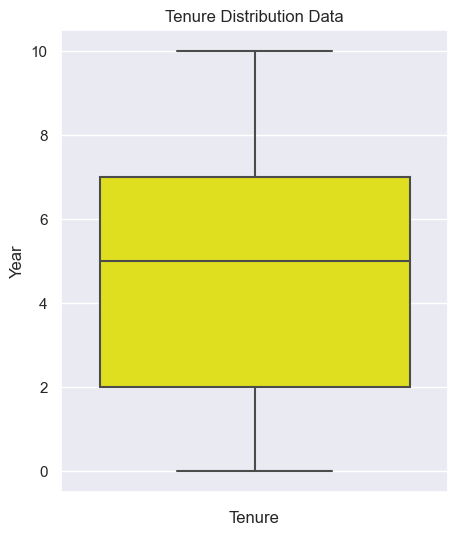

In [7]:
# check distribution of column 'Tenure' with boxplot
plt.figure(figsize=(5,6))
sns.boxplot(data=df_churn, y='Tenure', color='yellow')

# add attributes to the chart
plt.title('Tenure Distribution Data')
plt.ylabel('Year')
plt.xlabel('Tenure')

# displays graphs
plt.show()

It can be seen that the data in this column does not have `outliers`, so we can fill it using the `mean` value.

In [8]:
# average tenure
mean_tenure = round(df_churn['Tenure'].mean())
mean_tenure

5

In [9]:
# fill in the missing values in the 'Tenure' column
df_churn['Tenure'].fillna(mean_tenure, inplace=True)

# check for missing values in column 'Tenure'
df_churn['Tenure'].isna().sum()

0

Now we don't have a dataset that has missing values and the data is ready to be processed.

# Machine Learning Model Preparation <a id='cont_7'></a>

Making the best `machine learning model` requires several steps including: dividing the dataset, choosing an algorithm, testing the algorithm, `tuning hyperparamater`. Preparing dataset to train `machine learning models` is different from preparing data for ordinary statistical analysis.

## Creating One Hot Encoding (OHE) <a id='cont_8'></a>

In the dataset there are features/columns that contain categorical classes such as the `Geography` and `Gender` columns. We check whether the column is suitable for One Hot Encoding (OHE) application.

In [10]:
# check category data
# displays the geography column
print('Geography -->',df_churn['Geography'].unique())

# displays the gender column
print('Gender -->',df_churn['Gender'].unique())

Geography --> ['France' 'Spain' 'Germany']
Gender --> ['Female' 'Male']


Since the `Geography` and `Gender` columns contain only a small number of classes we can implement `One Hot Encoder (OHE)`.

In [11]:
# create dummies on categorical columns
df_churn = pd.get_dummies(df_churn, drop_first=True)

# displays the most recent sample dataset
df_churn.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1.0,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8.0,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1.0,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2.0,125510.82,1,1,1,79084.10,0,False,True,False


We can apply `One Hot Encoder (OHE)`.

## Separating Features and Target from Dataset <a id='cont_9'></a>

Here we will define the `Exited` column as `target` and the rest as `Features`.

In [12]:
# separate features and targets from the dataset
features = df_churn. drop('Exited', axis=1)
target = df_churn['Exited']

print('Features -->', features.shape)
print('Target -->', target.shape)

Features --> (10000, 11)
Target --> (10000,)


Now we have `11 Features` and `1 Target`.

## Scaling Features <a id='cont_10'></a>

Here we will `scaling` the numerical features to facilitate training in `machine learning models`. Let's check which numeric features we are `scaling`. Some big numeric features like 'CreditScore', 'Age', 'Balance', 'EstimatedSalary', but for 'Tenure' and 'NumOfProducts' we will review them.

In [13]:
# unique values in 'Tenure' and 'NumOfProducts' columns
print('Tenure -->',features['Tenure'].unique())
print('NumOfProducts -->',features['NumOfProducts'].unique())

Tenure --> [ 2.  1.  8.  7.  4.  6.  3. 10.  5.  9.  0.]
NumOfProducts --> [1 3 2 4]


We can see that the classes in these two features don't have a wide enough range, so we won't do `scaling` on this column.

Next we do `scaling` for the 'CreditScore', 'Age', 'Balance', 'EstimatedSalary' features.

In [14]:
# scale features using 'StandardScaler'
numeric = ['CreditScore','Age','Balance','EstimatedSalary']
features[numeric] = StandardScaler().fit_transform(features[numeric])

# displays feature samples
features.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,-0.326221,0.293517,2.0,-1.225848,1,1,1,0.021886,False,False,False
1,-0.440036,0.198164,1.0,0.117350,1,0,1,0.216534,False,True,False
2,-1.536794,0.293517,8.0,1.333053,3,1,0,0.240687,False,False,False
3,0.501521,0.007457,1.0,-1.225848,2,0,0,-0.108918,False,False,False
4,2.063884,0.388871,2.0,0.785728,1,1,1,-0.365276,False,True,False


We have finished `scaling` these features.

## Class Balance <a id='cont_11'></a>

To find out whether our dataset is balanced or unbalanced, we can find out in the `target` column. Let's find out.

In [15]:
# check the balance of the dataset using the target column
target.value_counts(normalize=True)

Exited
0    0.7963
1    0.2037
Name: proportion, dtype: float64

It can be seen that the dataset we have is in fact unbalanced where the proportion of `class 0` is far more than `class 1`.

## Splitting Dataset <a id='cont_12'></a>

Since we only have one dataset, we will divide it into two groups to create a `machine learning model`. The division is broken down into `80%` dataset for `training` and `20%` dataset for `validation`.

In [16]:
# divide the dataset into two kinds with training portion(80%) and validation(20%)
features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.20, random_state=12345)

# displays the shape of the variable above
print('feature train -->', features_train.shape)
print('feature valid -->', features_valid.shape)
print('target train -->', target_train.shape)
print('valid target -->', target_valid.shape)

feature train --> (8000, 11)
feature valid --> (2000, 11)
target train --> (8000,)
valid target --> (2000,)


We have succeeded in splitting the dataset according to the percentage.

# Application of Machine Learning Models <a id='cont_13'></a>

Next, we will create a `model` and `test` it using an algorithm that is suitable for this type of classification analysis including:
- Decision Tree Classification Algorithm
- Random Forest Classification Algorithm
- Logistic Regression Algorithm

The metrics used to test the quality of the model that we will apply include:
- F1 Score
- AUC-ROC

### Decision Tree Classification Algorithm <a id='cont_14'></a>

Here we will find out the optimal `depth` for the Classification Decision Tree Algorithm. We set the depth from 1 to 50.

In [17]:
# trial decision tree algorithm

# create a temporary variable
f1_best = 0
AUC_ROC_best = 0
depth_best = 0

# testing the depth of the decision tree model (depth -> 1 ~ 50)
for depth in range(1, 51):
    # create a decision tree model
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    # train the model using features and target train
    model.fit(features_train, target_train)
    # model predictions
    predict = model. predict(features_valid)
    predict_proba = model.predict_proba(features_valid)
    predict_one_valid = predict_proba[:,1]
    # calculate F1 and AUC_ROC using features and target validation
    f1 = f1_score(target_valid,predict)
    AUC_ROC = roc_auc_score(target_valid,predict_one_valid)

    if f1 > f1_best and AUC_ROC > AUC_ROC_best:
        f1_best = f1
        AUC_ROC_best = AUC_ROC
        depth_best = depth

# displays the output
print("Best Model (Decision Tree)")
print('Depth -->', depth_best)
print('F1 Score -->', f1_best)
print('AUC_ROC -->', AUC_ROC_best)

Best Model (Decision Tree)
Depth --> 5
F1 Score --> 0.5632183908045977
AUC_ROC --> 0.8451183689633763


From this we can see that the optimal depth is at `depth=5` where the quality of the model produces `F1 Score = 0.56` and `AUC_ROC=0.84`.

### Random Forest Classification Algorithm <a id='cont_15'></a>

In the same way, we set the tree depth (`depth`) from 1 to 20, while the number of trees (`n_estimators`) we set from 1 to 60.

In [18]:
# trial random forest algorithm
# tree depth: depth -> 1 ~ 20
# number of trees: n_estimators -> 1 ~ 60 {increment 10}

# create temporary
f1_best = 0
AUC_ROC_best = 0
depth_best = 0
estimators_best = 0

# testing the depth of the model and the number of trees
# setting the number of trees
for est in range(1, 61, 10):
     # setting the amount of tree depth
     for depth in range(1, 21):
         # create a random forest classifier model
         model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
         # train the model using features and target train
         model.fit(features_train, target_train)
         predict = model. predict(features_valid)
         predict_proba = model.predict_proba(features_valid)
         predict_one_valid = predict_proba[:,1]
         # calculate F1 and AUC_ROC using features and target validation
         f1 = f1_score(target_valid,predict)
         AUC_ROC = roc_auc_score(target_valid,predict_one_valid)

         if f1 > f1_best and AUC_ROC > AUC_ROC_best:
             f1_best = f1
             AUC_ROC_best = AUC_ROC
             depth_best = depth
             estimators_best = est

# displays the output
print("Best Model (Random Forest)")
print('Depth -->', depth_best)
print('Trees -->', estimators_best)
print('F1 Score -->', f1_best)
print('AUC_ROC -->', AUC_ROC_best)

Best Model (Random Forest)
Depth --> 10
Trees --> 21
F1 Score --> 0.5523520485584218
AUC_ROC --> 0.863364653230525


From this we can see that the optimal depth is at `depth=10` and the optimal number of trees is at `n_estimators=21` where the quality of the model produces `F1 Score = 0.55` and `AUC_ROC=0.86`.

### Logistic Regression Algorithm <a id='cont_16'></a>

In the same way, we will test the `logistic regression algorithm` using the 'liblinear' `solver`.

In [19]:
# logistic regression algorithm trials

# create a logistic regression model
model = LogisticRegression(random_state=12345, solver='liblinear')

# train the model using features and target train
model.fit(features_train, target_train)

# calculate accuracy using features and target validation
predict = model.predict(features_valid)
predict_proba = model.predict_proba(features_valid)
predict_one_valid = predict_proba[:,1]

# calculate F1 Score and AUC_ROC
f1 = f1_score(target_valid,predict)
AUC_ROC = roc_auc_score(target_valid,predict_one_valid)

# displays the output
print("Logistic Regression Model")
print('F1 Score -->', f1)
print('AUC_ROC -->', AUC_ROC)

Logistic Regression Model
F1 Score --> 0.2857142857142857
AUC_ROC --> 0.7575881644436042


From here we can see that the quality of the model produces `F1 Score = 0.28` and `AUC_ROC=0.76`.

Of the three models, what we will choose as the best algorithm is the `random forest` algorithm with the best `hyperparamater` at `depth=10` and `n_estimators=21`.

# Optimization of Machine Learning Models <a id='cont_17'></a>

Based on previous information that the dataset we have has an unbalanced class (`imbalance`), so the model is trained which is less than optimal. Let's optimize the dataset so that it becomes balanced (`balance`) and the `F1 Score` goes beyond the `threshold` set at `0.59`.

## Overcoming Unbalanced Classes (Imbalance) <a id='cont_18'></a>

The method that we will use to balance the dataset is `upsampling technique`, `downsampling` on the dataset and also enabling `class_weight = 'balanced'` in the model.

`Class 0` has far more numbers than `Class 1`, so we will double `Class 1` and reduce `Class 0`. Let's create a function.

In [20]:
# upsampling and downsampling the dataset

def up_down(feature,target,repeat,fraction):
    features_zero = feature[target == 0]
    feature_one = feature[target == 1]
    target_zero = target[target == 0]
    target_one = target[target == 1]

    # downsampling dataset
    down_1 = features_zero.sample(frac=fraction,random_state=12345)
    down_2 = target_zero.sample(frac=fraction,random_state=12345)

    # upsampling dataset
    temp_1 = pd.concat([down_1] + [feature_one]*repeat)
    temp_2 = pd.concat([down_2] + [target_one]*repeat)

    # scramble data
    features_new, target_new = shuffle(temp_1, temp_2, random_state=12345)

    return features_new, target_new

Next, let's create a new features and target. For balance let's multiply `Class 1` by `2x` and we `reduce 50%` on `Class 0`.

In [21]:
# apply to already created function repeat=2, fraction=50%
features_updown, target_updown = up_down(features_train, target_train, 2, 0.5)

# re-check the balance of the dataset on the target
target_updown.value_counts(normalize=True)

Exited
1    0.501949
0    0.498051
Name: proportion, dtype: float64

It has been seen that the new `Class 1` and `Class 0` are very close to being in balance (`balance`).

## Best Model Quality Metric (Optimized Model) <a id='cont_19'></a>

Next, we create an optimal model and test it using a balanced dataset (`balance`). We use the `Random Forest Algorithm` for `depth=10` and `n_estimators=21` and enable `class_weight = 'balanced'`.

In [22]:
# create a random forest model with balancing weights
#n_estimators = 21
# depth = 10

model = RandomForestClassifier(
     random_state = 12345,
     n_estimators = 21,
     max_depth = 10,
     class_weight = 'balanced'
     )

# train the model using the new dataset
model.fit(features_updown, target_updown)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=21,
                       random_state=12345)

Let's train the best model as well as test their quality.

In [23]:
# make predictions based on the model
predict = model.predict(features_valid)
predict_proba = model.predict_proba(features_valid)
predict_one_valid = predict_proba[:,1]

# create f1 score and AUC_ROC
f1 = f1_score(target_valid,predict)
AUC_ROC = roc_auc_score(target_valid,predict_one_valid)

print("Optimize Model (Random Forest)")
print('F1 Score -->', f1)
print('AUC_ROC -->', AUC_ROC)

Optimize Model (Random Forest)
F1 Score --> 0.6252465483234714
AUC_ROC --> 0.857552283781792


Now our model has a `F1 Score` of `0.62` which exceeds the `threshold` set of `0.59`.

# General Conclusion <a id='cont_20'></a>

From this project, we have loaded the necessary libraries, prepared the dataset, divided the dataset, trained and tested the `machine learning` model, and optimized the model by overcoming the `imbalance` in the dataset. It can be concluded as follows:
- Dataset division for training and testing `machine learning` models is divided into `80%` for `training` and `20%` for `validation`.
- Algorithms tested include: `Decision Tree Classification`, `Random Forest Classification`, and `Logistic Regression`.
- The best algorithm with `hyperparameter` is `Random Forest Classification Algorithm` with `hyperparameter` for `depth=10` and `n_estimators=21` with quality `F1 Score` of `0.55` and `AUC_ROC` of `0.86`.
- Methods for overcoming class imbalances, namely `upsampling technique`, `downsampling` in the dataset, and also enabling `class_weight = 'balanced'` in the model.
- The quality of the model produced after optimization produces an `F1 score` of `0.62` which exceeds the `threshold` set at `0.59`.